# Data Cleaning using Python

## Happiness data cleaning

***Scope***

Given five csv's from consecutive years, with no furtherf information other than the datasets.

The task is to clean & merge them into one df, which will ultimately be used to build a model to predict a country's happiness score.

### Importing required libraries and reading in the datasets

In [106]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Panda df options
pd.set_option('display.max_columns', None)  
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_colwidth', None) 

# Notebook Theme
rc = {'font.size':10, 'axes.labelsize':8, 'axes.titlesize':10}
sns.set_theme(style='whitegrid', palette='Set3', rc=rc)

In [107]:
# Read in data
df_2015 = pd.read_csv('./2015.csv')
df_2016 = pd.read_csv('./2016.csv')
df_2017 = pd.read_csv('./2017.csv')
df_2018 = pd.read_csv('./2018.csv')
df_2019 = pd.read_csv('./2019.csv')

### Looking at the annual dataframes

In [108]:
#view info for each df
print(df_2015.info(),
df_2016.info(),
df_2017.info(),
df_2018.info(),
df_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

* df_2015 contains 158 rows of data, 12 variables and has no null values
* df_2016 contains 157 rows of data, 13 variables and has no null values
* df_2017 contains 155 rows of data, 12 variables and has no null values
* df_2018 contains 156 rows of data, 9 variables and has 1 null value
* df_2019 contains 157 rows of data, 9 variables and has no null values

All the df's contain the variable `Generosity`

Ultimately the plan is to combine the 5 data sets into one df. So now is a good time to add a `Year` column into each data set, that way we don't lose traceability of the dataframes.

In [109]:
# Add year col into each df
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

### Looking at the indiv variables across the years

#### Happiness Score

In [110]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life 

We can see in 2016 & 17 we have a variable called `Happiness Score`. 

In 2018 we have a var called `Happiness.Score`. 

And in 2018 and 19 we have a var called `Score`. Lets take a look at them together.

In [111]:
# create df from each year for variable
df_happiness = pd.concat([df_2015['Happiness Score'], df_2016['Happiness Score'], df_2017['Happiness.Score'], df_2018['Score'], df_2019['Score']], axis=1)

In [112]:
# look at new df info
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Happiness Score  158 non-null    float64
 1   Happiness Score  157 non-null    float64
 2   Happiness.Score  155 non-null    float64
 3   Score            156 non-null    float64
 4   Score            156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [113]:
# numerical summary of df
df_happiness.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,158.0,5.375734,1.145010,2.839,4.52600,5.2325,6.24375,7.587
Happiness Score,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.26900,7.526
Happiness.Score,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.10150,7.537
Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769


The missing values in the new df are because there are 158 obs for this score in 2015 and less obs in the other data frames.

However we can see all of the happiness scores are floats and they range from 2.693 to 7.769

So we could make the fair assumption they are all measured using the same SI units.

Before combining the dataframes it might be a good idea to rename these columns the same, when concatenating them, so they do not add in additional columns for each variation of the spelling `Happiness Score` in the final dataframe.

In [114]:
# Rename col names
df_2017 = df_2017.rename(columns={'Happiness.Score':'Happiness Score'})
df_2018 = df_2018.rename(columns={'Score':'Happiness Score'})
df_2019 = df_2019.rename(columns={'Score':'Happiness Score'})

#### Country and Country or Region

In [115]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country or region', 'Happiness Score',
       'GDP per capita', 'Social support', 'Hea

We can see that compared to 2015 df the following differences between the dataframes

* `Country` and `Region` in 2015 & 16
* `Country` only in 2017
* `Country or region` in 2018 & 19

In [116]:
# view no. of unique entries in each df for this variable
print(df_2015['Country'].nunique(),
df_2016['Country'].nunique(),
df_2017['Country'].nunique(),
df_2018['Country or region'].nunique(),
df_2019['Country or region'].nunique())

158 157 155 156 156


In [117]:
# view no. of regions for 2015
df_2015['Region'].nunique()

10

In [118]:
# view no. of obs in each of the 10 regions
df_2015['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

All of the values for `Country or region` in 2018 & 2019 df's are unique. Which is not expected if the region were the value in some cases. You would expect some of the observations to repeat like we saw in the 2015 df. Which leads me to believe the only country names have been entered. Renaming the df's which have `Country or Region` var as `Country` is more descriptive.

In [119]:
# Rename the cols
df_2018 = df_2018.rename(columns={'Country or region':'Country'})
df_2019 = df_2019.rename(columns={'Country or region':'Country'})

As the column now called `Country` in each data frame appears to be a unique identifier for each dataset's year. 

Combined with the knowledge that some yearly datasets have fewer rows than others, this leads to the conclusion that some countries have obs in one data set but not another.

Lets take a look at 2015 compared to the other df's.

##### 2015 vs 2016 `Country`

In [120]:
# look to see which countries are in 2015 but not in 2016
is_in_2015 = ~df_2015['Country'].isin(df_2016['Country'])
in_15_not_in_16 = df_2015.loc[is_in_2015]
in_15_not_in_16['Country']

21                         Oman
90            Somaliland region
93                   Mozambique
96                      Lesotho
100                   Swaziland
125                    Djibouti
147    Central African Republic
Name: Country, dtype: object

In [121]:
# is in 2016 but not in 2015
is_in_2016 = ~df_2016['Country'].isin(df_2015['Country'])
in_16_not_in_15 = df_2016.loc[is_in_2016]
in_16_not_in_15['Country']

14           Puerto Rico
51                Belize
75               Somalia
96     Somaliland Region
112              Namibia
142          South Sudan
Name: Country, dtype: object

We have the obs Somiland region in 2015 and Somiliand Region (with capital R) in 2016. 

In Python strings are case sensitive, so this has been noted to fix later if we are keeping this variable.

In 2016 data set we have Somaliland Region and Somalia after doing some research, Somaliland (or Somaliland Region) is actually an autonomous region in northern Somalia, which broke away and declared independence from Somalia in 1991.

##### 2015 vs 2017 `Country`

In [122]:
# look to see which countries are in 2015 but not in 2017
is_in_2015 = ~df_2015['Country'].isin(df_2017['Country'])
in_15_not_in_17 = df_2015.loc[is_in_2015]
in_15_not_in_17['Country']

21                  Oman
37                Taiwan
39              Suriname
71             Hong Kong
90     Somaliland region
98                  Laos
100            Swaziland
125             Djibouti
139              Comoros
Name: Country, dtype: object

In [123]:
# is in 2017 but not in 2015
is_in_2017 = ~df_2017['Country'].isin(df_2015['Country'])
in_17_not_in_15 = df_2017.loc[is_in_2017]
in_17_not_in_15['Country']

32     Taiwan Province of China
49                       Belize
70      Hong Kong S.A.R., China
92                      Somalia
110                     Namibia
146                 South Sudan
Name: Country, dtype: object

We have the obs Hong Kong in 2015 and Hong Kong S.A.R., China) in 2017. Note made.

We're now starting to see a pattern of the same countries missing in 2015, which are present in 2016 & 2017. They are Belize, Somalia, Namibia & South Sudan.

And vice versa for Oman, Swaziland & Djibouti.

##### 2015 vs 2018 `Country`

In [124]:
# look to see which countries are in 2015 but not in 2018
is_in_2015 = ~df_2015['Country'].isin(df_2018['Country'])
in_15_not_in_18 = df_2015.loc[is_in_2015]
in_15_not_in_18['Country']

21                    Oman
39                Suriname
40     Trinidad and Tobago
65            North Cyprus
90       Somaliland region
100              Swaziland
125               Djibouti
139                Comoros
Name: Country, dtype: object

In [125]:
# is in 2018 but not in 2015
is_in_2018 = ~df_2018['Country'].isin(df_2015['Country'])
in_18_not_in_15 = df_2018.loc[is_in_2018]
in_18_not_in_15['Country']

37     Trinidad & Tobago
48                Belize
57       Northern Cyprus
97               Somalia
118              Namibia
153          South Sudan
Name: Country, dtype: object

We have again some alternative spellings for a couple of countries:

* Trinidad and Tobago (2015 version) vs Trinidad & Tobago (2018)
* North Cyprus (2015) vs Northern Cyprus (2018)

We have the same pattern of some repeating countries comparing 2015 to the other datasets. They are:

* Belize, Somalia, Namibia & South Sudan - all present in 2016, 17 & 18 datasets but omitted from 2015
* Oman, Swaziland & Djibouti - present in 2015 & not present in 2016, 17 & 18.


##### 2015 vs 2019 `Country`

In [126]:
# look to see which countries are in 2015 but not in 2019
is_in_2015 = ~df_2015['Country'].isin(df_2019['Country'])
in_15_not_in_19 = df_2015.loc[is_in_2015]
in_15_not_in_19['Country']

21                    Oman
39                Suriname
40     Trinidad and Tobago
65            North Cyprus
90       Somaliland region
92               Macedonia
117                  Sudan
125               Djibouti
136                 Angola
Name: Country, dtype: object

In [127]:
# is in 2019 but not in 2015
is_in_2019 = ~df_2019['Country'].isin(df_2015['Country'])
in_19_not_in_15 = df_2019.loc[is_in_2019]
in_19_not_in_15['Country']

38     Trinidad & Tobago
63       Northern Cyprus
83       North Macedonia
111              Somalia
112              Namibia
119               Gambia
155          South Sudan
Name: Country, dtype: object

We have some alternative spellings for a couple of countries:

* Trinidad and Tobago (2015 version) vs Trinidad & Tobago (2019)
* North Cyprus (2015) vs Northern Cyprus (2019)
* Macedonia (2015) vs North Macedonia (2019) - changes its name it 2019 (after bit of research).

We have a new pattern of some repeating countries comparing 2015 dataset to the other datasets. They are:

* Somalia, Namibia & South Sudan - all present in 2016, 17, 18 & 19 datasets but omitted from 2015
* Oman & Djibouti - present in 2015 & not present in 2016, 17, 18 & 19


Looking at the inital permutations from comparison of 2015 data set to the others, we have two options to proceed:

1. We can systematically go through each permutation of the data sets and find the differences, match the spellings and delete the entire row of data for the countries which are not in the other data sets. This will lose a min of 8 observations for each row deleted, but quite likely more data will be lost.
2. We keep all of the other columns of data which can be used to predict the happiness score and delete the `Country` column to eradicate this mismatching of data.

For the inital comparison from 2015 to the other data sets. This will mean we would lose the following countries:
* (from 2015 dataset) Oman, Mozambique, Lesotho, Swaziland, Djibouti, Central African Republic, Taiwan, Suriname, Somaliland Region, Laos, Comoros, Sudan & Angola
* (from 2016) Puerto Rico & Belize
* (2017) Belize
* (2018) Belize
* (2019) Gambia
* (from 2016, 17, 18 & 19) Somalia, Namibia & South Sudan

So a total of 19 rows of data from just this inital comparison from 2015 to the other data sets meaning a min of 152 other observations out of an initial 6256 probable feature obs. Admittedly it is only 2% of the data at present. However if the comparison of 2016 vs the other data sets, then 2017 vs other years and so on results in the same amout of data points lost we could potentially lose about 10% of the remaining data.

Based on the above and the intuition that the name of a country wouldn't really have much effect on the Happiness Score, we'll take the second option and drop this variable.

#### Region

We have a column called `Region` in 2015 & 2016 dataframes only. We saw earlier that in 2018 & 2019 these were actually looking like countries not regions as you would expect (repetition for other rows of data). And finally this column is entirely omitted from the 2017 dataset. 

The fact we do not have like for like in each of the data sets and the intuition that a region name is probably not going to have much bearing on `Happiness Score` this variable will also be omittted when combining the data sets.

#### Happiness Rank

In [128]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life 

We can see in 2016 & 17 we have a variable called `Happiness Rank`. 

In 2018 we have a var called `Happiness.Rank`. 

And in 2018 and 19 we have a var called `Overall rank`. Lets take a look at them. 

In [129]:
# create df from each year for variable
df_rank = pd.concat([df_2015['Happiness Rank'], df_2016['Happiness Rank'], 
                     df_2017['Happiness.Rank'], df_2018['Overall rank'], df_2019['Overall rank']], axis=1)

In [130]:
# look at new df info
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Happiness Rank  158 non-null    int64  
 1   Happiness Rank  157 non-null    float64
 2   Happiness.Rank  155 non-null    float64
 3   Overall rank    156 non-null    float64
 4   Overall rank    156 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.3 KB


In [131]:
# numerical summary of df
df_rank.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.0,40.25,79.5,118.75,158.0
Happiness Rank,157.0,78.980892,45.466030,1.0,40.00,79.0,118.00,157.0
Happiness.Rank,155.0,78.000000,44.888751,1.0,39.50,78.0,116.50,155.0
Overall rank,156.0,78.500000,45.177428,1.0,39.75,78.5,117.25,156.0
Overall rank,156.0,78.500000,45.177428,1.0,39.75,78.5,117.25,156.0


The missing values in the new df are for the missing rows (countries) in the other df's.

We can see all of the happiness ranks are floats except from 2015 and they range from 1 to to the total no. of rows in the data.

This shows they are all the ranks of the countries that have been observed in that annual df and ranked according to their happiness score.

We can check also this assumption by using a scatterplot, to see if there is a relationship evident.

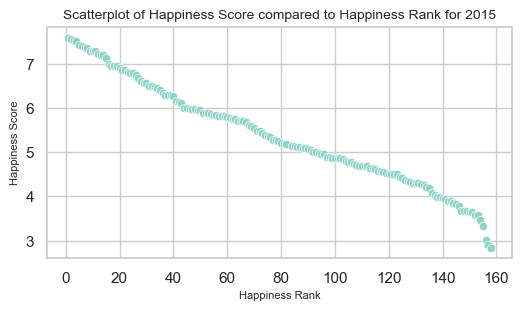

                 Happiness Score  Happiness Rank
Happiness Score         1.000000       -0.992105
Happiness Rank         -0.992105        1.000000 
                  Happiness Score  Happiness Rank
Happiness Score         1.000000       -0.995743
Happiness Rank         -0.995743        1.000000 
                  Happiness Score  Happiness.Rank
Happiness Score         1.000000       -0.992774
Happiness.Rank         -0.992774        1.000000 
                  Happiness Score  Overall rank
Happiness Score         1.000000     -0.991749
Overall rank           -0.991749      1.000000 
                  Happiness Score  Overall rank
Happiness Score         1.000000     -0.989096
Overall rank           -0.989096      1.000000


In [132]:
 # scatterplot of two numerical vars
fig, ax = plt.subplots (figsize=(6,3))
sns.scatterplot(data=df_2015, x='Happiness Rank', y='Happiness Score')
ax.set(title='Scatterplot of Happiness Score compared to Happiness Rank for 2015')
plt.show()

# checking for correlation between the years
print(df_2015[['Happiness Score', 'Happiness Rank']].corr(), '\n',
           df_2016[['Happiness Score', 'Happiness Rank']].corr(), '\n',
           df_2017[['Happiness Score', 'Happiness.Rank']].corr(), '\n',
           df_2018[['Happiness Score', 'Overall rank']].corr(), '\n',
           df_2019[['Happiness Score', 'Overall rank']].corr())

It appears `Happiness Score` which is the dependant variable, also feeds into the calculation for `Happiness Rank` and this would also cause data leakage, when modelling.

Thinking about it chronologically we have a feature here, that we would not be able to input for future predictions of `Happiness Score`, however we could use it as a feature when predicting the `Happiness Score` of past years for countries.

The interpretation of the task set, has been to make future predictions of `Happiness Scores`. If we want to know the past years we could simply reference the data sets given. So  will omit this column when combining the data frames.

#### GPD per Capita

In [133]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life 

We can see in 2016 & 17 we have a variable called `Economy (GDP per Capita)`. 

In 2018 we have a var called `Economy..GDP.per.Capita.`. 

And in 2018 and 19 we have a var called `GDP per capita`.

In [134]:
# create df from each year for variable
df_econ = pd.concat([df_2015['Economy (GDP per Capita)'], df_2016['Economy (GDP per Capita)'], 
                     df_2017['Economy..GDP.per.Capita.'], df_2018['GDP per capita'], df_2019['GDP per capita']], axis=1)

In [135]:
# look at new df info
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Economy (GDP per Capita)  158 non-null    float64
 1   Economy (GDP per Capita)  157 non-null    float64
 2   Economy..GDP.per.Capita.  155 non-null    float64
 3   GDP per capita            156 non-null    float64
 4   GDP per capita            156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [136]:
# numerical summary of df
df_econ.describe().T

,count,mean,std,min,25%,50%,75%,max
Economy (GDP per Capita),158.0,0.846137,0.403121,0.0,0.545808,0.910245,1.158448,1.690420
Economy (GDP per Capita),157.0,0.953880,0.412595,0.0,0.670240,1.027800,1.279640,1.824270
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.0,0.663371,1.064578,1.318027,1.870766
GDP per capita,156.0,0.891449,0.391921,0.0,0.616250,0.949500,1.197750,2.096000
GDP per capita,156.0,0.905147,0.398389,0.0,0.602750,0.960000,1.232500,1.684000


The missing values in the new df are for the missing rows (countries) in the other df's.

We can see all of the GDP's are floats and they range from 0 to to 2.096. It is possible for the country's GDP to be zero. After some research this indicates the country uses a barter system. However the max values appear low which suggests this is a GDP percentage.

The magnitudes are comparable to each other so I will rename to match before combining the df's.

In [137]:
# Rename col names
df_2017 = df_2017.rename(columns={'Economy..GDP.per.Capita.':'Economy (GDP per Capita)'})
df_2018 = df_2018.rename(columns={'GDP per capita':'Economy (GDP per Capita)'})
df_2019 = df_2019.rename(columns={'GDP per capita':'Economy (GDP per Capita)'})

#### Family

In [138]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support', 'Hea

We can see in 2016, 17 & 18 we have a variable called `Family`. 

And in 2018 and 19 we have a var called `Social support`. Lets take a look.

In [139]:
# create df from each year for variable
df_family = pd.concat([df_2015['Family'], df_2016['Family'], df_2017['Family'], df_2018['Social support'], df_2019['Social support']], axis=1)

In [140]:
# look at new df info
df_family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Family          158 non-null    float64
 1   Family          157 non-null    float64
 2   Family          155 non-null    float64
 3   Social support  156 non-null    float64
 4   Social support  156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [141]:
# numerical summary of df
df_family.describe().T

,count,mean,std,min,25%,50%,75%,max
Family,158.0,0.991046,0.272369,0.0,0.856823,1.029510,1.214405,1.402230
Family,157.0,0.793621,0.266706,0.0,0.641840,0.841420,1.021520,1.183260
Family,155.0,1.188898,0.287263,0.0,1.042635,1.253918,1.414316,1.610574
Social support,156.0,1.213237,0.302372,0.0,1.066750,1.255000,1.463000,1.644000
Social support,156.0,1.208814,0.299191,0.0,1.055750,1.271500,1.452500,1.624000


The missing values in the new df are for the missing rows (countries) in the other df's.

We can see all of the GDP's are floats and they range from 0 to to 1.644.
Whilst and average family size of a country could be 1.644, it can't be zero.
This leads me to believe where the value was missing, zero was used instead.

The ranges are all similar so lets rename the variables firstly in the original df's so we don't forget later.

In [142]:
# Rename col names
df_2018 = df_2018.rename(columns={'Social support':'Family'})
df_2019 = df_2019.rename(columns={'Social support':'Family'})

Now lets take a look where the values equal zero

In [143]:
df_2015[df_2015['Family'] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223,2015


In [144]:
df_2016[df_2016['Family'] == 0]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.0,0.24811,0.34678,0.11587,0.17517,2.1354,2016


In [145]:
df_2017[df_2017['Family'] == 0]

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
154,Central African Republic,155,2.693,2.864884,2.521116,0.0,0.0,0.018773,0.270842,0.280876,0.056565,2.066005,2017


In [146]:
df_2018[df_2018['Family'] == 0]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
154,155,Central African Republic,3.083,0.024,0.0,0.01,0.305,0.218,0.038,2018


In [147]:
df_2019[df_2019['Family'] == 0]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
154,155,Central African Republic,3.083,0.026,0.0,0.105,0.225,0.235,0.035,2019


##### CAR

We can see Central African Republic has data missing for this value in all df's except 2016. It has also been known as Ubangi-Shari, lets see if we can see these country name in the 2016 df

In [148]:
df_2016['Country'].tolist()

['Denmark',
 'Switzerland',
 'Iceland',
 'Norway',
 'Finland',
 'Canada',
 'Netherlands',
 'New Zealand',
 'Australia',
 'Sweden',
 'Israel',
 'Austria',
 'United States',
 'Costa Rica',
 'Puerto Rico',
 'Germany',
 'Brazil',
 'Belgium',
 'Ireland',
 'Luxembourg',
 'Mexico',
 'Singapore',
 'United Kingdom',
 'Chile',
 'Panama',
 'Argentina',
 'Czech Republic',
 'United Arab Emirates',
 'Uruguay',
 'Malta',
 'Colombia',
 'France',
 'Thailand',
 'Saudi Arabia',
 'Taiwan',
 'Qatar',
 'Spain',
 'Algeria',
 'Guatemala',
 'Suriname',
 'Kuwait',
 'Bahrain',
 'Trinidad and Tobago',
 'Venezuela',
 'Slovakia',
 'El Salvador',
 'Malaysia',
 'Nicaragua',
 'Uzbekistan',
 'Italy',
 'Ecuador',
 'Belize',
 'Japan',
 'Kazakhstan',
 'Moldova',
 'Russia',
 'Poland',
 'South Korea',
 'Bolivia',
 'Lithuania',
 'Belarus',
 'North Cyprus',
 'Slovenia',
 'Peru',
 'Turkmenistan',
 'Mauritius',
 'Libya',
 'Latvia',
 'Cyprus',
 'Paraguay',
 'Romania',
 'Estonia',
 'Jamaica',
 'Croatia',
 'Hong Kong',
 'Somalia',

Neither name is in the list - we can get consensus data from this website to impute it https://globaldatalab.org/areadata/table/hhsize/CAF

However the figures are much higher than the remaining countries and our assumption this is average family size may be incorrect.

So to ensure the data prepared for modelling is as accurate as possible I will remove this country's data from the data sets so as to not incur spurios predictions when modelling

In [149]:
# Drop row from df
df_2015.drop(147, inplace=True, axis=0)
# reset index as now out of sequence
df_2015.reset_index(drop=True)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
153,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
154,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
155,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [150]:
# Drop row from df
df_2017.drop(154, inplace=True, axis=0)
# reset index as now out of sequence
df_2017.reset_index(drop=True)

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,2017
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017


In [151]:
# Drop row from df
df_2018.drop(154, inplace=True, axis=0)
# reset index as now out of sequence
df_2018.reset_index(drop=True)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,2018
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018


In [152]:
# Drop row from df
df_2019.drop(154, inplace=True, axis=0)
# reset index as now out of sequence
df_2019.reset_index(drop=True)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,2019
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019


##### Togo

In 2016 df Togo family is missing it is also known as Togolese Republic, lets see if either name is in any of the other dataframes

In [153]:
df_2015[df_2015['Country'] == 'Togo']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015


In [154]:
df_2017[df_2017['Country'] == 'Togo']

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,2017


In [155]:
df_2018[df_2018['Country'] == 'Togo']

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
138,139,Togo,3.999,0.259,0.474,0.253,0.434,0.158,0.101,2018


In [156]:
df_2019[df_2019['Country'] == 'Togo']

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
138,139,Togo,4.085,0.275,0.572,0.41,0.293,0.177,0.085,2019


In 2015 the value was 0.13995, in '17 its 0.431883, in '18 its 0.474 and in '19 it is 0.572

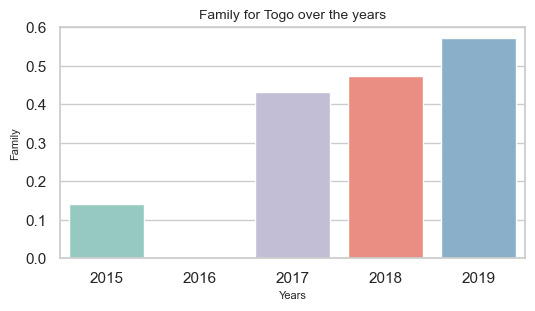

In [157]:
# Plot existing data points
x_point = [2015, 2016, 2017, 2018, 2019]
y_point = [0.13995, 0, 0.431883, 0.474, 0.572]

fig, ax = plt.subplots (figsize=(6,3))
sns.barplot(x=x_point, y=y_point)
ax.set(xlabel='Years', ylabel='Family', title='Family for Togo over the years');

Here we can see that family size has grown over the years, but simply drawing a straight line across will not give us an accurate value to impute. 

Instead I will opt to take the middle point of the difference between 2015 and 2017 and impute this instead. 

In [158]:
((0.431883-0.13995) /2) + 0.13995

0.2859165

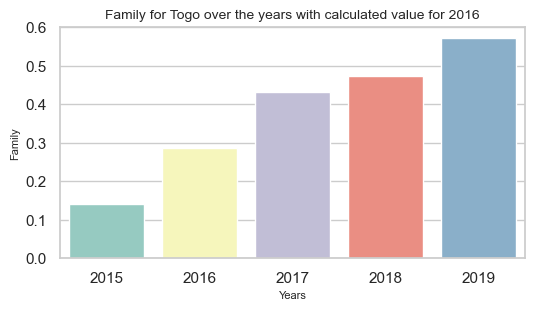

In [159]:
# replot with calculated value
x_point_a = [2015, 2016, 2017, 2018, 2019]
y_point_a = [0.13995, 0.2859165, 0.431883, 0.474, 0.572]

fig, ax = plt.subplots (figsize=(6,3))
sns.barplot(x=x_point_a, y=y_point_a)
ax.set(xlabel='Years', ylabel='Family', title='Family for Togo over the years with calculated value for 2016');

This looks to be a more realistic value so I'll choose this one

In [160]:
# replace the zero value in df
df_2016['Family'].replace(0, 0.2859165, inplace=True)

#### Health (Life Expectancy)

In [161]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Healthy lif

We can see in 2016 & 17 we have a variable called `Health (Life Expectancy)`

In 2018 we have a var called `Health..Life.Expectancy.`

And in 2018 and 19 we have a var called `Healthy life expectancy`. Lets take a look. 

In [162]:
# create df from each year for variable
df_health = pd.concat([df_2015['Health (Life Expectancy)'], df_2016['Health (Life Expectancy)'], 
                       df_2017['Health..Life.Expectancy.'], df_2018['Healthy life expectancy'], df_2019['Healthy life expectancy']], axis=1)

In [163]:
# look at new df info
df_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 147
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Health (Life Expectancy)  157 non-null    float64
 1   Health (Life Expectancy)  157 non-null    float64
 2   Health..Life.Expectancy.  154 non-null    float64
 3   Healthy life expectancy   155 non-null    float64
 4   Healthy life expectancy   155 non-null    float64
dtypes: float64(5)
memory usage: 7.4 KB


In [164]:
# numerical summary of df
df_health.describe().T

,count,mean,std,min,25%,50%,75%,max
Health (Life Expectancy),157.0,0.633847,0.243705,0.0,0.440550,0.697020,0.811600,1.025250
Health (Life Expectancy),157.0,0.557619,0.229349,0.0,0.382910,0.596590,0.729930,0.952770
Health..Life.Expectancy.,154.0,0.554799,0.233891,0.0,0.380798,0.609627,0.724903,0.949492
Healthy life expectancy,155.0,0.601135,0.243801,0.0,0.426500,0.645000,0.778500,1.030000
Healthy life expectancy,155.0,0.729245,0.237677,0.0,0.553000,0.789000,0.882500,1.141000


The missing values in the new df are for the missing rows (countries) in the other df's.

We can see all of the obs are floats and they range from 0 to to 1.03 (to 2 d.p.).

It appears the ages have been divided by 100 so I'll rename the cols and multiply the values by 100 to return back.

It is possible that the life expectancy can be zero or it could be the data has been omitted. So we'll take a look at these countries as well.

In [165]:
# Rename col names in orig df
df_2017 = df_2017.rename(columns={'Health..Life.Expectancy.':'Health (Life Expectancy)'})
df_2018 = df_2018.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'})
df_2019 = df_2019.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'})

In [166]:
#multiply the cols by 100
df_2015['Health (Life Expectancy)'] = df_2015['Health (Life Expectancy)'].multiply(100)
df_2016['Health (Life Expectancy)'] = df_2016['Health (Life Expectancy)'].multiply(100)
df_2017['Health (Life Expectancy)'] = df_2017['Health (Life Expectancy)'].multiply(100)
df_2018['Health (Life Expectancy)'] = df_2018['Health (Life Expectancy)'].multiply(100)
df_2019['Health (Life Expectancy)'] = df_2019['Health (Life Expectancy)'].multiply(100)

In [167]:
df_2015[df_2015['Health (Life Expectancy)'] == 0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009,2015


In [168]:
df_2016[df_2016['Health (Life Expectancy)'] == 0]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
110,Sierra Leone,Sub-Saharan Africa,111,4.635,4.505,4.765,0.36485,0.628,0.0,0.30685,0.08196,0.23897,3.01402,2016


In [169]:
df_2017[df_2017['Health (Life Expectancy)'] == 0]

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
138,Lesotho,139,3.808,4.044344,3.571656,0.521021,1.190095,0.0,0.390661,0.157497,0.119095,1.429835,2017


In [170]:
df_2018[df_2018['Health (Life Expectancy)'] == 0]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
112,113,Sierra Leone,4.571,0.256,0.813,0.0,0.355,0.238,0.053,2018


In [173]:
df_2019[df_2019['Health (Life Expectancy)'] == 0]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
134,135,Swaziland,4.212,0.811,1.149,0.0,0.313,0.074,0.135,2019


The 3 affected countries are:
    
* Sierra Leone in 2015, '16 & '18
* Lesotho in 2017
* Swaziland in 2019

##### Sierra Leone

In [174]:
df_2017[df_2017['Country'] == 'Sierra Leone']

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
105,Sierra Leone,106,4.709,4.850643,4.567357,0.368421,0.984136,0.556475,0.318698,0.293041,0.071095,2.66846,2017


In [175]:
df_2019[df_2019['Country'] == 'Sierra Leone']

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
128,129,Sierra Leone,4.374,0.268,0.841,24.2,0.309,0.252,0.045,2019


2017 is in between 2016 & 2018 where the life expectancy shows as less than 1, so it is possible that these values are correct (and in 2015. But there was certainly a change in 2019 where it jumped to 24.2. Still a very low figure considering but this could be explained by an introduction of health initiative of some kind so I will leave this values as is for now.

##### Lesotho

In [176]:
df_2015[df_2015['Country'] == 'Lesotho']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,7.612,0.31767,0.12504,0.16388,2.79832,2015


In [177]:
df_2018[df_2018['Country'] == 'Lesotho']

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
140,141,Lesotho,3.808,0.472,1.215,7.9,0.423,0.116,0.112,2018


In [178]:
df_2019[df_2019['Country'] == 'Lesotho']

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom to make life choices,Generosity,Perceptions of corruption,Year
143,144,Lesotho,3.802,0.489,1.169,16.8,0.359,0.107,0.093,2019


There is no data for Lesotho in 2016 however the ages for Lesotho in 2015 & 2018 are 7.612 and 7.9 with a jump in 2019 again seen.

Therefore I'll impute the value for this country with the middle of the difference of 2015 & 2018 values

In [179]:
((7.9 - 7.612) /2) + 7.612

7.756

In [180]:
# replace the zero value in df
df_2017['Health (Life Expectancy)'].replace(0, 7.756, inplace=True)

##### Swaziland

In [181]:
df_2015[df_2015['Country'] == 'Swaziland']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,7.566,0.30658,0.0306,0.18259,2.48676,2015


There is no data for 2016, '17 & 2018 for Swaziland and given we saw a jump in the last two countries in 2019, I can't imagine it decreasing in 2019. Therefore I will impute the value as the same for 2015 leaving out the assumed jump. However assuming it is above zero at this point

In [182]:
# replace the zero value in df
df_2019['Health (Life Expectancy)'].replace(0, 7.566, inplace=True)

#### Freedom

In [183]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

We can see in 2016, 17 & 18 we have a variable called `Freedom`. 

And in 2018 and 19 we have a var called `Freedom to make life choices`. Lets take a look at them. 

In [184]:
# create df from each year for variable
df_freedom = pd.concat([df_2015['Freedom'], df_2016['Freedom'], df_2017['Freedom'], df_2018['Freedom to make life choices'], df_2019['Freedom to make life choices']], axis=1)

In [185]:
# look at new df info
df_freedom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 147
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Freedom                       157 non-null    float64
 1   Freedom                       157 non-null    float64
 2   Freedom                       154 non-null    float64
 3   Freedom to make life choices  155 non-null    float64
 4   Freedom to make life choices  155 non-null    float64
dtypes: float64(5)
memory usage: 7.4 KB


In [186]:
# numerical summary of df
df_freedom.describe().T

,count,mean,std,min,25%,50%,75%,max
Freedom,157.0,0.428232,0.151098,0.0,0.328180,0.43477,0.550110,0.669730
Freedom,157.0,0.370994,0.145507,0.0,0.257480,0.39747,0.484530,0.608480
Freedom,154.0,0.409682,0.150070,0.0,0.307313,0.43888,0.517596,0.658249
Freedom to make life choices,155.0,0.455471,0.162502,0.0,0.357500,0.49300,0.579000,0.724000
Freedom to make life choices,155.0,0.393652,0.143114,0.0,0.310000,0.41700,0.507500,0.631000


The missing values in the new df are for the missing rows (countries) in the other df's.

We can see all of the obs are floats and they range from 0 to to 0.724.

It is possible a country has zero as a Freedom figure so I will leave that as it is for now.

They all measured using the same SI units (possibly a percentage) and so are comparable to each other so I will rename to match before combining the df's.

In [191]:
# Rename col names
df_2018 = df_2018.rename(columns={'Freedom to make life choices':'Freedom'})
df_2019 = df_2019.rename(columns={'Freedom to make life choices':'Freedom'})

#### Trust (Government Corruption)

In [192]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

We can see in 2016 & 17 we have a variable called `Trust (Government Corruption)`. 

In 2018 we have a var called `Trust..Government.Corruption.`

And in 2018 and 19 we have a var called `Perceptions of corruption`. Lets take a look at them. 

In [193]:
# create df from each year for variable
df_trust = pd.concat([df_2015['Trust (Government Corruption)' ], df_2016['Trust (Government Corruption)'], 
                      df_2017['Trust..Government.Corruption.'], df_2018['Perceptions of corruption'], df_2019['Perceptions of corruption']], axis=1)

In [194]:
# look at new df info
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 147
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Trust (Government Corruption)  157 non-null    float64
 1   Trust (Government Corruption)  157 non-null    float64
 2   Trust..Government.Corruption.  154 non-null    float64
 3   Perceptions of corruption      154 non-null    float64
 4   Perceptions of corruption      155 non-null    float64
dtypes: float64(5)
memory usage: 7.4 KB


In [195]:
# numerical summary of df
df_trust.describe().T

,count,mean,std,min,25%,50%,75%,max
Trust (Government Corruption),157.0,0.143807,0.120320,0.0,0.061460,0.107310,0.180600,0.551910
Trust (Government Corruption),157.0,0.137624,0.111038,0.0,0.061260,0.105470,0.175540,0.505210
Trust..Government.Corruption.,154.0,0.123552,0.101849,0.0,0.057931,0.089914,0.153411,0.464308
Perceptions of corruption,154.0,0.112481,0.096620,0.0,0.051250,0.082000,0.137500,0.457000
Perceptions of corruption,155.0,0.111090,0.094647,0.0,0.048500,0.086000,0.141500,0.453000


The missing values in the new df are for the missing rows (countries) in the other df's.

We can see all of the obs are floats and they range from 0 to to 0.55191

It is also possible that the countries have zero Trust in a government.

This leads me to believe they are all measured using the same SI units (another percentage perhaps) and so are comparable to each other so I will rename to match before combining the df's.

In [196]:
# Rename col names
df_2017 = df_2017.rename(columns={'Trust..Government.Corruption.':'Trust (Government Corruption)'})
df_2018 = df_2018.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'})
df_2019 = df_2019.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'})

We saw earlier that df_2018 has one missing value in `Perceptions of corruption` which is now `Trust (Government Corruption)`

In [197]:
# look at the entry
df_2018[df_2018['Trust (Government Corruption)'].isna()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
19,20,United Arab Emirates,6.774,2.096,0.776,67.0,0.284,0.186,NaN,2018


In [198]:
# get values for UAE over the years
Trust_15 = pd.Series(df_2015[df_2015['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)
Trust_16 = pd.Series(df_2016[df_2016['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)
Trust_17 = pd.Series(df_2017[df_2017['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)
Trust_19 = pd.Series(df_2019[df_2019['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)

UAE_trust = pd.DataFrame({'2015':Trust_15, '2016':Trust_16, '2017':Trust_17 ,'2018':0, '2019':Trust_19})
UAE_trust = UAE_trust.T.reset_index()
# UAE_trust

# Rename col names
UAE_trust.rename(columns={ UAE_trust.columns[0]: 'Year', UAE_trust.columns[1]: 'Trust',}, inplace = True)
UAE_trust

,Year,Trust
0,2015,0.38583
1,2016,0.35561
2,2017,0.32449
3,2018,0.00000
4,2019,0.18200


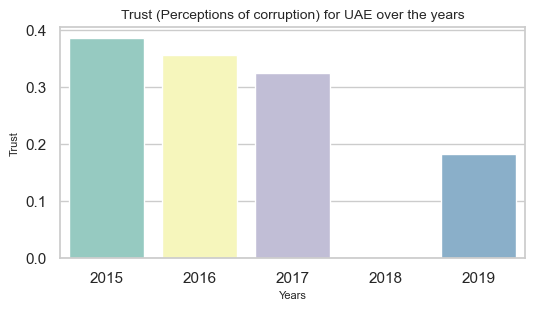

In [199]:
# plot UAE trust
fig, ax = plt.subplots (figsize=(6,3))
sns.barplot(data=UAE_trust, x='Year', y='Trust')
ax.set(xlabel='Years', ylabel='Trust', title='Trust (Perceptions of corruption) for UAE over the years', xticklabels=['2015', '2016', '2017', '2018', '2019']);

We can see here there is a downward trend in the years for Trust for UAE over the years in pretty much a straight line. 

So to impute a realistic value for this missing value we can find the equation of this line and then pop in the year 2018.

In [200]:
# eqn of stright line (y = mx + c)
# Define the known x and y points
x_points = [2015, 2016, 2017, 2019]
y_points = [0.38583, 0.35561, 0.32449, 0.182]

# Calculate the coefficients m & c
coefficients = np.polyfit(x_points, y_points, 1)

# Print the findings & eqn of stright line
print('m =', coefficients[0])
print('c =', coefficients[1])
print(f'The eqn of the stright line is y = {coefficients[0].round(3)}x + {coefficients[1].round(3)} (to 3 d.p.)')

m = -0.05157571428569167
c = 104.32730428566863
The eqn of the stright line is y = -0.052x + 104.327 (to 3 d.p.)


In [201]:
# pop in 2018 for x
(-0.05157571428569167*2018) + 104.32730428566863

0.2475128571428371

In [202]:
# impute the calculated value for 2018
df_2018['Trust (Government Corruption)'].fillna(0.2475128571428371, inplace=True)

#### Dystopia Residual

In [203]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

We can see in 2016 & 17 we have a variable called `Dystopia Residual`. 

In 2018 we have a var called `Dystopia.Residual`. 

And in 2018 and 19 this variable is missing (nothing comparable) so I will omit this variable when combining df's later

#### Standard error, LCI, UCI, Whisker.high, Whisker.low

In [204]:
# look at each df col names
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

* 2015 contains `Standard Error`
* 2016 contains `Lower Confidence Interval` & `Upper Confidence Interval`
* 2017 contains `Whisker.high` & `Whisker.low`

And in 2018 and 19 this variable is missing (nothing comparable) so I will omit this variable as well when combining df's

### Combining the df's (using concat instead of merge)

As mentioned earlier some of the data sets contain the columns `Region`, `Standard Error`, `Lower Confidence Interval`, `Upper Confidence Interval`, `Whisker.high`, `Whisker.low` & `Dystopia`, whilst other data sets do not have these columns or something comparable. So I will remove these columns so we do not have null values in the combined datasets for these obs for these columns.

We also decided to omit the column `Country` & `Happiness Rank` as explained earlier.

When we stack the data sets on top of each other, I imagine we will need the same column names in the same order so we don't stack the columns incorrectly. I will use the 2015 data set as a template for re-arranging the columns in the other data sets. I will move the new column `Year` to the first column. I will also move the variable we are going to predict (the label) to the rightmost column, just to help with coding it to seperate out later when required, (so it's iloc will be -1).

In [205]:
# look at the order of cols for 2015 template
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Standard Error                 157 non-null    float64
 5   Economy (GDP per Capita)       157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Generosity                     157 non-null    float64
 11  Dystopia Residual              157 non-null    float64
 12  Year                           157 non-null    int64  


In [206]:
# re-order the columns 
df_2015_a = df_2015.iloc[:,[12,5,6,7,8,9,10,3]]
df_2015_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2015,1.39651,1.34951,94.143,0.66557,0.41978,0.29678,7.587
1,2015,1.30232,1.40223,94.784,0.62877,0.14145,0.43630,7.561
2,2015,1.32548,1.36058,87.464,0.64938,0.48357,0.34139,7.527
3,2015,1.45900,1.33095,88.521,0.66973,0.36503,0.34699,7.522
4,2015,1.32629,1.32261,90.563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...
153,2015,0.22208,0.77370,42.864,0.59201,0.55191,0.22628,3.465
154,2015,0.28665,0.35386,31.910,0.48450,0.08010,0.18260,3.340
155,2015,0.66320,0.47489,72.193,0.15684,0.18906,0.47179,3.006
156,2015,0.01530,0.41587,22.396,0.11850,0.10062,0.19727,2.905


In [207]:
# locate column index
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [208]:
# re-order the cols
df_2016_a = df_2016.iloc[:,[13,6,7,8,9,10,11,3]]
df_2016_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2016,1.44178,1.163740,79.504,0.57941,0.44453,0.36171,7.526
1,2016,1.52733,1.145240,86.303,0.58557,0.41203,0.28083,7.509
2,2016,1.42666,1.183260,86.733,0.56624,0.14975,0.47678,7.501
3,2016,1.57744,1.126900,79.579,0.59609,0.35776,0.37895,7.498
4,2016,1.40598,1.134640,81.091,0.57104,0.41004,0.25492,7.413
...,...,...,...,...,...,...,...,...
152,2016,0.39499,0.104190,21.028,0.39747,0.06681,0.20180,3.484
153,2016,0.38227,0.110370,17.344,0.16430,0.07112,0.31268,3.360
154,2016,0.28123,0.285917,24.811,0.34678,0.11587,0.17517,3.303
155,2016,0.74719,0.148660,62.994,0.06912,0.17233,0.48397,3.069


In [209]:
# look at df info
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        154 non-null    object 
 1   Happiness.Rank                 154 non-null    int64  
 2   Happiness Score                154 non-null    float64
 3   Whisker.high                   154 non-null    float64
 4   Whisker.low                    154 non-null    float64
 5   Economy (GDP per Capita)       154 non-null    float64
 6   Family                         154 non-null    float64
 7   Health (Life Expectancy)       154 non-null    float64
 8   Freedom                        154 non-null    float64
 9   Generosity                     154 non-null    float64
 10  Trust (Government Corruption)  154 non-null    float64
 11  Dystopia.Residual              154 non-null    float64
 12  Year                           154 non-null    int

In [210]:
df_2017_a = df_2017.iloc[:,[12,5,6,7,8,10,9,2]]
df_2017_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2017,1.616463,1.533524,79.666650,0.635423,0.315964,0.362012,7.537
1,2017,1.482383,1.551122,79.256552,0.626007,0.400770,0.355280,7.522
2,2017,1.480633,1.610574,83.355212,0.627163,0.153527,0.475540,7.504
3,2017,1.564980,1.516912,85.813129,0.620071,0.367007,0.290549,7.494
4,2017,1.443572,1.540247,80.915767,0.617951,0.382612,0.245483,7.469
...,...,...,...,...,...,...,...,...
149,2017,0.305445,0.431883,24.710557,0.380426,0.095665,0.196896,3.495
150,2017,0.368746,0.945707,32.642481,0.581844,0.455220,0.252756,3.471
151,2017,0.777153,0.396103,50.053334,0.081539,0.151347,0.493664,3.462
152,2017,0.511136,1.041990,36.450928,0.390018,0.066035,0.354256,3.349


In [211]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Overall rank                   155 non-null    int64  
 1   Country                        155 non-null    object 
 2   Happiness Score                155 non-null    float64
 3   Economy (GDP per Capita)       155 non-null    float64
 4   Family                         155 non-null    float64
 5   Health (Life Expectancy)       155 non-null    float64
 6   Freedom                        155 non-null    float64
 7   Generosity                     155 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Year                           155 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 17.4+ KB


In [212]:
df_2018_a = df_2018.iloc[:,[9,3,4,5,6,8,7,2]]
df_2018_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2018,1.305,1.592,87.4,0.681,0.393,0.202,7.632
1,2018,1.456,1.582,86.1,0.686,0.340,0.286,7.594
2,2018,1.351,1.590,86.8,0.683,0.408,0.284,7.555
3,2018,1.343,1.644,91.4,0.677,0.138,0.353,7.495
4,2018,1.420,1.549,92.7,0.660,0.357,0.256,7.487
...,...,...,...,...,...,...,...,...
150,2018,0.332,0.896,40.0,0.636,0.444,0.200,3.408
151,2018,0.442,1.073,34.3,0.244,0.064,0.083,3.355
152,2018,0.455,0.991,38.1,0.481,0.097,0.270,3.303
153,2018,0.337,0.608,17.7,0.112,0.106,0.224,3.254


In [213]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Overall rank                   155 non-null    int64  
 1   Country                        155 non-null    object 
 2   Happiness Score                155 non-null    float64
 3   Economy (GDP per Capita)       155 non-null    float64
 4   Family                         155 non-null    float64
 5   Health (Life Expectancy)       155 non-null    float64
 6   Freedom                        155 non-null    float64
 7   Generosity                     155 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Year                           155 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 17.4+ KB


In [214]:
df_2019_a = df_2019.iloc[:,[9,3,4,5,6,8,7,2]]
df_2019_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2019,1.340,1.587,98.6,0.596,0.393,0.153,7.769
1,2019,1.383,1.573,99.6,0.592,0.410,0.252,7.600
2,2019,1.488,1.582,102.8,0.603,0.341,0.271,7.554
3,2019,1.380,1.624,102.6,0.591,0.118,0.354,7.494
4,2019,1.396,1.522,99.9,0.557,0.298,0.322,7.488
...,...,...,...,...,...,...,...,...
150,2019,0.287,1.163,46.3,0.143,0.077,0.108,3.380
151,2019,0.359,0.711,61.4,0.555,0.411,0.217,3.334
152,2019,0.476,0.885,49.9,0.417,0.147,0.276,3.231
153,2019,0.350,0.517,36.1,0.000,0.025,0.158,3.203


In [215]:
# Stack the DataFrames on top of each other now the columns match the same order, drop the old index as will be out of sequence and set new row index
df = pd.concat([df_2015_a, df_2016_a, df_2017_a, df_2018_a, df_2019_a], axis=0)
df.reset_index(drop=True, inplace=True)
# look at new df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           778 non-null    int64  
 1   Economy (GDP per Capita)       778 non-null    float64
 2   Family                         778 non-null    float64
 3   Health (Life Expectancy)       778 non-null    float64
 4   Freedom                        778 non-null    float64
 5   Trust (Government Corruption)  778 non-null    float64
 6   Generosity                     778 non-null    float64
 7   Happiness Score                778 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 48.8 KB


In [216]:
# Check for missing values
df.isna().sum()

Year                             0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Happiness Score                  0
dtype: int64

Now we are ready to do our EDA analysis for another project.